### Loading, viewing, and exploring data

In [2]:
# Import pandas
import pandas as pd

# Read the file into a DF: df
df = pd.read_csv('data/dob_job_application_filings_subset.csv')

# Print the head, tail, shape, and columns of df
print('Head:\n', df.head())
print('Tail:\n', df.tail())
print('Shape:\n', df.shape) #shape is an attribute, not method, so no () is required after
print('Columns:\n', df.columns) #column is an attribute, not method, so no () is required after

Head:
        Job #  Doc #        Borough       House #  \
0  121577873      2      MANHATTAN  386            
1  520129502      1  STATEN ISLAND  107            
2  121601560      1      MANHATTAN  63             
3  121601203      1      MANHATTAN  48             
4  121601338      1      MANHATTAN  45             

                        Street Name  Block  Lot    Bin # Job Type Job Status  \
0  PARK AVENUE SOUTH                   857   38  1016890       A2          D   
1  KNOX PLACE                          342    1  5161350       A3          A   
2  WEST 131 STREET                    1729    9  1053831       A2          Q   
3  WEST 25TH STREET                    826   69  1015610       A2          D   
4  WEST 29 STREET                      831    7  1015754       A3          D   

            ...                         Owner's Last Name  \
0           ...            MIGLIORE                         
1           ...            BLUMENBERG                       
2           ... 

/Applications/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# Subset df --> df_subset
df_subset = df[['Job #', 'Doc #', 'Borough', 'Initial Cost', 'Total Est. Fee', 'Existing Zoning Sqft',\
               'Proposed Zoning Sqft', 'Enlargement SQ Footage', 'Street Frontage', 'ExistingNo. of Stories',\
               'Proposed No. of Stories', 'Existing Height', 'Proposed Height']]

# Print the head, tail, shape, and columns of df_subset
print('Head:\n', df_subset.head())
print('Tail:\n', df_subset.tail())
print('shape:\n', df_subset.shape) #shape is an attribute, not method, so no () is required after
print('columns:\n', df_subset.columns) #column is an attribute, not method, so no () is required after

Head:
        Job #  Doc #        Borough Initial Cost Total Est. Fee  \
0  121577873      2      MANHATTAN    $75000.00        $986.00   
1  520129502      1  STATEN ISLAND        $0.00       $1144.00   
2  121601560      1      MANHATTAN    $30000.00        $522.50   
3  121601203      1      MANHATTAN     $1500.00        $225.00   
4  121601338      1      MANHATTAN    $19500.00        $389.50   

   Existing Zoning Sqft  Proposed Zoning Sqft  Enlargement SQ Footage  \
0                     0                     0                       0   
1                     0                     0                       0   
2                     0                     0                       0   
3                     0                     0                       0   
4                     0                     0                       0   

   Street Frontage  ExistingNo. of Stories  Proposed No. of Stories  \
0                0                       0                        0   
1              

In [30]:
# Print the info of df_subset
print(df_subset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12846 entries, 0 to 12845
Data columns (total 13 columns):
Job #                      12846 non-null int64
Doc #                      12846 non-null int64
Borough                    12846 non-null object
Initial Cost               12846 non-null object
Total Est. Fee             12846 non-null object
Existing Zoning Sqft       12846 non-null int64
Proposed Zoning Sqft       12846 non-null int64
Enlargement SQ Footage     12846 non-null int64
Street Frontage            12846 non-null int64
ExistingNo. of Stories     12846 non-null int64
Proposed No. of Stories    12846 non-null int64
Existing Height            12846 non-null int64
Proposed Height            12846 non-null int64
dtypes: int64(10), object(3)
memory usage: 1.3+ MB
None


In [34]:
# View the data to confirm if it's the wrong type - notice $ signs in data
df_temp = df_subset[['Initial Cost', 'Total Est. Fee']]
df_temp.head()

,Initial Cost,Total Est. Fee
0,$75000.00,$986.00
1,$0.00,$1144.00
2,$30000.00,$522.50
3,$1500.00,$225.00
4,$19500.00,$389.50


In [36]:
# Describe the column 'Existing Height'. Note: can only be used on numeric columns
df['Existing Height'].describe()

count    12846.000000
mean        94.022809
std        146.917360
min          0.000000
25%         20.000000
50%         45.000000
75%        105.000000
max       4200.000000
Name: Existing Height, dtype: float64

### Frequency counts for categorical data

In [40]:
# Print the value counts for 'Borough', 'State', and 'Site Fill'
print(df['Borough'].value_counts(dropna=False))
print(df['State'].value_counts(dropna=False))
print(df['Site Fill'].value_counts(dropna=False))

# Frequency counts give a good way to perform a sanity check on data...
# eg why are there applications filled outside of NY when 12,846 records have the NY Burough

MANHATTAN        6310
BROOKLYN         2866
QUEENS           2121
BRONX             974
STATEN ISLAND     575
Name: Borough, dtype: int64
NY    12391
NJ      241
PA       38
CA       20
OH       19
FL       17
IL       17
CT       16
TX       13
TN       10
MD        7
DC        7
KS        6
MA        6
GA        6
VA        5
CO        4
MN        3
SC        3
AZ        3
WI        3
RI        2
UT        2
NC        2
NM        1
IN        1
MI        1
VT        1
WA        1
Name: State, dtype: int64
NOT APPLICABLE                              7806
NaN                                         4205
ON-SITE                                      519
OFF-SITE                                     186
USE UNDER 300 CU.YD                          130
Name: Site Fill, dtype: int64


### Visual exploratory data analysis

#### Histogram - for single variables

count    1.284600e+04
mean     1.439973e+03
std      3.860757e+04
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.873107e+06
Name: Existing Zoning Sqft, dtype: float64


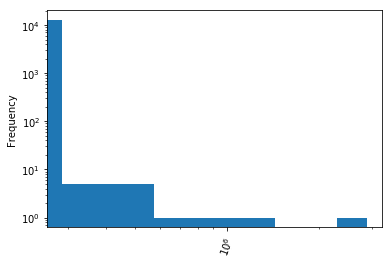

In [43]:
# Import matplotlib.pyplot
import matplotlib.pyplot as plt

# Describe the column
print(df['Existing Zoning Sqft'].describe())

# Plot the histogram
df['Existing Zoning Sqft'].plot(kind='hist', rot=70, logx=True, logy=True)

# Display the histogram
plt.show()

#### Boxplot -  - for multiple variables

In [ ]:
# Import packages
import pandas as pd
import matplotlib.pyplot as plt

# Create the boxplot
df.boxplot(column='Initial Cost', by='Borough', rot=70)

# Display the plot
plt.show()

# Cell not ran because column 'Initial Cost' is not cleaned and throws an error - $ needs to be removed... later

#### Scatter plot  - for multiple variables

In [ ]:
# Create and display the scatter plot
df.plot(type='scatter', x='Initial Cost', y='Total Est. Fee', rot=70)
plt.show()

# Cell not ran because column data not cleaned and throws an error... covered later in course

### Tidy data for analysis

##### For data to be tidy, it must have:
    -Each variable as a seperate column
    -Each row as a seperate observation

#### Melt data

In [22]:
### The below data is being melted (transformed) from a tidy format to an untidy one

# Import pacakges
import pandas as pd

# Read DF: airquality
airquality = pd.read_csv('data/airquality.csv')

# Print the head of airquality
print(airquality.head())

# Melt all columns of airquality but 'Month' & 'Day' to airquality_melt 
# then rename 'variable' to 'measurement' and rename 'value' to 'reading': 
airquality_melt = pd.melt(frame=airquality, id_vars=['Month', 'Day'],\
                          var_name='measurement', value_name='reading')

print('\n')

# Print the head of airquality_melt
print(airquality_melt.head())

   Ozone  Solar.R  Wind  Temp  Month  Day
0   41.0    190.0   7.4    67      5    1
1   36.0    118.0   8.0    72      5    2
2   12.0    149.0  12.6    74      5    3
3   18.0    313.0  11.5    62      5    4
4    NaN      NaN  14.3    56      5    5


   Month  Day measurement  reading
0      5    1       Ozone     41.0
1      5    2       Ozone     36.0
2      5    3       Ozone     12.0
3      5    4       Ozone     18.0
4      5    5       Ozone      NaN


#### Pivot data

In [23]:
# Pivot airquality_melt: airquality_pivot
# With rows indexed by 'Month' & 'Day', and columns indexed by 'measurement', and values populated with 'reading'
airquality_pivot = pd.pivot_table(data=airquality_melt, index=['Month', 'Day'],\
                                  columns='measurement', values='reading')

print(airquality_pivot.head())

measurement  Ozone  Solar.R  Temp  Wind
Month Day                              
5     1       41.0    190.0  67.0   7.4
      2       36.0    118.0  72.0   8.0
      3       12.0    149.0  74.0  12.6
      4       18.0    313.0  62.0  11.5
      5        NaN      NaN  56.0  14.3


#### Resetting the index of a DataFrame

In [32]:
# Put DF back into its original form

# Print the index of airquality_pivot
print(airquality_pivot.index)

# Reset the index of airquality_pivot: airquality_pivot_reset
airquality_pivot_reset = airquality_pivot.reset_index()

# Print the new index of airquality_pivot_reset
print(airquality_pivot_reset.index)

# Print the head of airquality_pivot_reset
print('\n', airquality_pivot_reset.head())

MultiIndex(levels=[[5, 6, 7, 8, 9], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]],
           labels=[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 0, 1, 2, 3, 4, 5, 6, 7, 8, 

#### Pivoting duplicate values

In [115]:
# Note: airquality_dup isn't available, so airquality_melt is used instead for demo (doesn't contain duplicates)
# The aggfunction tells python how to handle duplicate values. In this case, we take the mean (also the default). 

# Import packages
import numpy as np

# Pivot table the airquality_dup: airquality_pivot
airquality_pivot = pd.pivot_table(data=airquality_melt, index=['Month', 'Day'],\
                                  columns='measurement', values='reading', aggfunc=np.mean)

# Print the head of airquality_pivot before reset_index
print(airquality_pivot.head())

# Reset the index of airquality_pivot
airquality_pivot = airquality_pivot.reset_index()


# Print the head of airquality_pivot
print(airquality_pivot.head())

# Print the head of airquality
print(airquality.head())

measurement  Ozone  Solar.R  Temp  Wind
Month Day                              
5     1       41.0    190.0  67.0   7.4
      2       36.0    118.0  72.0   8.0
      3       12.0    149.0  74.0  12.6
      4       18.0    313.0  62.0  11.5
      5        NaN      NaN  56.0  14.3
measurement  Month  Day  Ozone  Solar.R  Temp  Wind
0                5    1   41.0    190.0  67.0   7.4
1                5    2   36.0    118.0  72.0   8.0
2                5    3   12.0    149.0  74.0  12.6
3                5    4   18.0    313.0  62.0  11.5
4                5    5    NaN      NaN  56.0  14.3
   Ozone  Solar.R  Wind  Temp  Month  Day
0   41.0    190.0   7.4    67      5    1
1   36.0    118.0   8.0    72      5    2
2   12.0    149.0  12.6    74      5    3
3   18.0    313.0  11.5    62      5    4
4    NaN      NaN  14.3    56      5    5


#### Splitting a colum

In [39]:
# Load tb.csv into tb
tb = pd.read_csv('data/tb.csv')

tb.head()

,country,year,m014,m1524,m2534,m3544,m4554,m5564,m65,mu,f014,f1524,f2534,f3544,f4554,f5564,f65,fu
0,AD,2000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AE,2000,2.0,4.0,4.0,6.0,5.0,12.0,10.0,NaN,3.0,16.0,1.0,3.0,0.0,0.0,4.0,NaN
2,AF,2000,52.0,228.0,183.0,149.0,129.0,94.0,80.0,NaN,93.0,414.0,565.0,339.0,205.0,99.0,36.0,NaN
3,AG,2000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,0.0,0.0,0.0,NaN
4,AL,2000,2.0,19.0,21.0,14.0,24.0,19.0,16.0,NaN,3.0,11.0,10.0,8.0,8.0,5.0,11.0,NaN


In [48]:
# Melt tb: tb_melt
# Keeping 'country' and 'year' fixed
tb_melt = pd.melt(frame=tb, id_vars=['country', 'year'])
print(tb_melt.head())
print(tb_melt.tail())

  country  year variable  value
0      AD  2000     m014    0.0
1      AE  2000     m014    2.0
2      AF  2000     m014   52.0
3      AG  2000     m014    0.0
4      AL  2000     m014    2.0
     country  year variable  value
3211      YE  2000       fu    NaN
3212      YU  2000       fu    NaN
3213      ZA  2000       fu    NaN
3214      ZM  2000       fu    NaN
3215      ZW  2000       fu    NaN


In [50]:
# Create a 'gender' column
tb_melt['gender'] = tb_melt.variable.str[0]
tb_melt.head()

,country,year,variable,value,gender
0,AD,2000,m014,0.0,m
1,AE,2000,m014,2.0,m
2,AF,2000,m014,52.0,m
3,AG,2000,m014,0.0,m
4,AL,2000,m014,2.0,m


In [55]:
# Create the 'age_group' column
tb_melt['age_group'] = tb_melt.variable.str[1:]
tb_melt.head()

,country,year,variable,value,gender,age_group
0,AD,2000,m014,0.0,m,014
1,AE,2000,m014,2.0,m,014
2,AF,2000,m014,52.0,m,014
3,AG,2000,m014,0.0,m,014
4,AL,2000,m014,2.0,m,014


#### Splitting a column with .split() and .get()

In [196]:
# Load ebola.csv into ebola
ebola = pd.read_csv('data/ebola.csv')
ebola.head()

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
0,1/5/2015,289,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,1786.0,NaN,2977.0,NaN,NaN,NaN,NaN,NaN
1,1/4/2015,288,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,1781.0,NaN,2943.0,NaN,NaN,NaN,NaN,NaN
2,1/3/2015,287,2769.0,8166.0,9722.0,NaN,NaN,NaN,NaN,NaN,1767.0,3496.0,2915.0,NaN,NaN,NaN,NaN,NaN
3,1/2/2015,286,NaN,8157.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3496.0,NaN,NaN,NaN,NaN,NaN,NaN
4,12/31/2014,284,2730.0,8115.0,9633.0,NaN,NaN,NaN,NaN,NaN,1739.0,3471.0,2827.0,NaN,NaN,NaN,NaN,NaN


In [197]:
# Melt ebola: ebola_melt
ebola_melt = pd.melt(ebola, id_vars=['Date', 'Day'], var_name='type_country', value_name='counts')
ebola_melt.head()

,Date,Day,type_country,counts
0,1/5/2015,289,Cases_Guinea,2776.0
1,1/4/2015,288,Cases_Guinea,2775.0
2,1/3/2015,287,Cases_Guinea,2769.0
3,1/2/2015,286,Cases_Guinea,NaN
4,12/31/2014,284,Cases_Guinea,2730.0


In [198]:
# Create the 'str_split' column
ebola_melt['str_split'] = ebola_melt['type_country'].str.split('_')
ebola_melt.head()

,Date,Day,type_country,counts,str_split
0,1/5/2015,289,Cases_Guinea,2776.0,"[Cases, Guinea]"
1,1/4/2015,288,Cases_Guinea,2775.0,"[Cases, Guinea]"
2,1/3/2015,287,Cases_Guinea,2769.0,"[Cases, Guinea]"
3,1/2/2015,286,Cases_Guinea,NaN,"[Cases, Guinea]"
4,12/31/2014,284,Cases_Guinea,2730.0,"[Cases, Guinea]"


In [199]:
# Create the 'type' column
ebola_melt['type'] = ebola_melt['str_split'].str.get(0)

# Create the 'country' column
ebola_melt['country'] = ebola_melt['str_split'].str.get(1)

ebola_melt[970:980]

,Date,Day,type_country,counts,str_split,type,country
970,3/28/2014,6,Cases_Mali,NaN,"[Cases, Mali]",Cases,Mali
971,3/27/2014,5,Cases_Mali,NaN,"[Cases, Mali]",Cases,Mali
972,3/26/2014,4,Cases_Mali,NaN,"[Cases, Mali]",Cases,Mali
973,3/25/2014,3,Cases_Mali,NaN,"[Cases, Mali]",Cases,Mali
974,3/24/2014,2,Cases_Mali,NaN,"[Cases, Mali]",Cases,Mali
975,3/22/2014,0,Cases_Mali,NaN,"[Cases, Mali]",Cases,Mali
976,1/5/2015,289,Deaths_Guinea,1786.0,"[Deaths, Guinea]",Deaths,Guinea
977,1/4/2015,288,Deaths_Guinea,1781.0,"[Deaths, Guinea]",Deaths,Guinea
978,1/3/2015,287,Deaths_Guinea,1767.0,"[Deaths, Guinea]",Deaths,Guinea
979,1/2/2015,286,Deaths_Guinea,NaN,"[Deaths, Guinea]",Deaths,Guinea


### Concatenate data

#### Row concatenation - adding rows with the same columns

In [200]:
# Concatenate uber with itself: row_concat
row_concat = pd.concat([uber, uber])

# Print the shape of uber
print(uber.shape)

# Print the shape of row_concat
print(row_concat.shape)

# Print the head of row_concat
print(row_concat.head())

(297, 5)
(594, 5)
   Unnamed: 0         Date/Time      Lat      Lon    Base
0           0  4/1/2014 0:11:00  40.7690 -73.9549  B02512
1           1  4/1/2014 0:17:00  40.7267 -74.0345  B02512
2           2  4/1/2014 0:21:00  40.7316 -73.9873  B02512
3           3  4/1/2014 0:28:00  40.7588 -73.9776  B02512
4           4  4/1/2014 0:33:00  40.7594 -73.9722  B02512


#### Column concatenation - adding columns with the same number of rows

In [201]:
# Create status_country DF for example
status_country_type = ebola_melt['type']
status_country_country = ebola_melt['country']
status_country = pd.concat([status_country_type, status_country_country], axis=1)


# Remove end columns that are in DF 'status_country': ebola_melt
ebola_melt = ebola_melt[['Date', 'Day', 'type_country', 'counts', 'str_split']]

# View DF to ensure it is correct
ebola_melt.head()

,Date,Day,type_country,counts,str_split
0,1/5/2015,289,Cases_Guinea,2776.0,"[Cases, Guinea]"
1,1/4/2015,288,Cases_Guinea,2775.0,"[Cases, Guinea]"
2,1/3/2015,287,Cases_Guinea,2769.0,"[Cases, Guinea]"
3,1/2/2015,286,Cases_Guinea,NaN,"[Cases, Guinea]"
4,12/31/2014,284,Cases_Guinea,2730.0,"[Cases, Guinea]"


In [204]:
# View DF to ensure it is correct
status_country.head()

,type,country
0,Cases,Guinea
1,Cases,Guinea
2,Cases,Guinea
3,Cases,Guinea
4,Cases,Guinea


In [205]:
# Concatenate ebola_melt and status_country column-wise: ebola_tidy
# axis=1 denotes that the concat will be column-wise - default is axis=0 (row-wise)
ebola_tidy = pd.concat([ebola_melt, status_country], axis=1)

# Print the shape of ebola_tidy
print(ebola_tidy.shape)

# Print the head of ebola_tidy
print(ebola_tidy.head())

(1952, 7)
         Date  Day  type_country  counts        str_split   type country
0    1/5/2015  289  Cases_Guinea  2776.0  [Cases, Guinea]  Cases  Guinea
1    1/4/2015  288  Cases_Guinea  2775.0  [Cases, Guinea]  Cases  Guinea
2    1/3/2015  287  Cases_Guinea  2769.0  [Cases, Guinea]  Cases  Guinea
3    1/2/2015  286  Cases_Guinea     NaN  [Cases, Guinea]  Cases  Guinea
4  12/31/2014  284  Cases_Guinea  2730.0  [Cases, Guinea]  Cases  Guinea


### Globbing

In [208]:
# Globbing:
# Pattern matching for files
# -Wilcards: '*' and '?'
#    -Ex: *.csv will find any file ending with .csv
#    -Ex: file_?.csv will find any file with one alpha-numeric character after file_ eg file_1
#        - No special characters eg '/'
# -Returns list of filenames

In [214]:
# Import packages
import glob
import pandas as pd

# Write the pattern to match all .csv files
pattern = 'data/uber/*.csv'

# Save all file matches
csv_files = glob.glob(pattern)

# Print the filename list
print(csv_files)

# Load the second file into a DF: csv2
csv2 = pd.read_csv(csv_files[1])

print(csv2.head())

['data/uber/uber-raw-data-2014_04.csv', 'data/uber/uber-raw-data-2014_05.csv', 'data/uber/uber-raw-data-2014_06.csv']
          Date/Time      Lat      Lon    Base
0  5/1/2014 0:02:00  40.7521 -73.9914  B02512
1  5/1/2014 0:06:00  40.6965 -73.9715  B02512
2  5/1/2014 0:15:00  40.7464 -73.9838  B02512
3  5/1/2014 0:17:00  40.7463 -74.0011  B02512
4  5/1/2014 0:17:00  40.7594 -73.9734  B02512


#### Iterating and concatenating all glob matches into one DF

In [229]:
# Create an empty list
frames = []

# Iterate over csv_files - the three files that matched the pattern above
for csv in csv_files:
    df = pd.read_csv(csv) # Read csv into a DF: df
    frames.append(df)     # Append each df to frames list
    
# Concatenate the list of 3 (99x4) frames into a single DF (297x4): uber
uber = pd.concat(frames)

print(uber.shape)
print(uber.head())

(297, 4)
          Date/Time      Lat      Lon    Base
0  4/1/2014 0:11:00  40.7690 -73.9549  B02512
1  4/1/2014 0:17:00  40.7267 -74.0345  B02512
2  4/1/2014 0:21:00  40.7316 -73.9873  B02512
3  4/1/2014 0:28:00  40.7588 -73.9776  B02512
4  4/1/2014 0:33:00  40.7594 -73.9722  B02512


### Merging data - combining datasets based on common columns - similar to SQL
Three types: 1) one-to-one 2) many-to-one 3) many-to-many

In [258]:
# Create the DF's for the ex
site = pd.read_csv('data/site.csv')
visited = pd.read_csv('data/visited_partial.csv')

print(site) 
print(visited)

    name    lat    long
0   DR-1 -49.85 -128.57
1   DR-3 -47.15 -126.72
2  MSK-4 -48.87 -123.40
   ident   site       dated
0    619   DR-1  1927-02-08
1    734   DR-3  1939-01-07
2    837  MSK-4  1932-01-14


In [259]:
# Merge the DF's: o2o (one-to-one)
o2o = pd.merge(left=site, right=visited, left_on='name', right_on='site')
o2o

,name,lat,long,ident,site,dated
0,DR-1,-49.85,-128.57,619,DR-1,1927-02-08
1,DR-3,-47.15,-126.72,734,DR-3,1939-01-07
2,MSK-4,-48.87,-123.40,837,MSK-4,1932-01-14


In [260]:
# Create the DF's for the ex
visited_m2o = pd.read_csv('data/visited_m2o.csv')

visited_m2o.head()

,ident,site,dated
0,619,DR-1,1927-02-08
1,622,DR-1,1927-02-10
2,734,DR-3,1939-01-07
3,735,DR-3,1930-01-12
4,751,DR-3,1930-02-26


In [261]:
# Merge the DF's: m2o (many-to-one)
m2o = pd.merge(left=site, right=visited_m2o, left_on='name', right_on='site')
m2o

,name,lat,long,ident,site,dated
0,DR-1,-49.85,-128.57,619,DR-1,1927-02-08
1,DR-1,-49.85,-128.57,622,DR-1,1927-02-10
2,DR-1,-49.85,-128.57,844,DR-1,1932-03-22
3,DR-3,-47.15,-126.72,734,DR-3,1939-01-07
4,DR-3,-47.15,-126.72,735,DR-3,1930-01-12
5,DR-3,-47.15,-126.72,751,DR-3,1930-02-26
6,DR-3,-47.15,-126.72,752,DR-3,NaN
7,MSK-4,-48.87,-123.40,837,MSK-4,1932-01-14


In [262]:
# Create the DF's for the ex
survey = pd.read_csv('data/survey.csv')

survey.head()

,taken,person,quant,reading
0,619,dyer,rad,9.82
1,619,dyer,sal,0.13
2,622,dyer,rad,7.80
3,622,dyer,sal,0.09
4,734,pb,rad,8.41


In [263]:
# Merge the DF's: m2m (many-to-many)
m2m = pd.merge(left=site, right=visited, left_on='name', right_on='site')
m2m = pd.merge(left=m2m, right=survey, left_on='ident', right_on='taken')
m2m.head(20)

,name,lat,long,ident,site,dated,taken,person,quant,reading
0,DR-1,-49.85,-128.57,619,DR-1,1927-02-08,619,dyer,rad,9.82
1,DR-1,-49.85,-128.57,619,DR-1,1927-02-08,619,dyer,sal,0.13
2,DR-3,-47.15,-126.72,734,DR-3,1939-01-07,734,pb,rad,8.41
3,DR-3,-47.15,-126.72,734,DR-3,1939-01-07,734,lake,sal,0.05
4,DR-3,-47.15,-126.72,734,DR-3,1939-01-07,734,pb,temp,-21.50
5,MSK-4,-48.87,-123.40,837,MSK-4,1932-01-14,837,lake,rad,1.46
6,MSK-4,-48.87,-123.40,837,MSK-4,1932-01-14,837,lake,sal,0.21
7,MSK-4,-48.87,-123.40,837,MSK-4,1932-01-14,837,roe,sal,22.50


### Data types

In [21]:
import os
print(os.listdir('data'))

['.DS_Store', 'a_movie.json', 'airquality.csv', 'auto.csv', 'battledeath.xlsx', 'boston.csv', 'Chinook.sqlite', 'digits.csv', 'digits_header.txt', 'disarea.dta', 'dob_job_application_filings_subset.csv', 'ebola.csv', 'gapminder.csv', 'gm_2008_region.csv', 'house-votes-84.csv', 'ind_pop_data.csv', 'ja_data2.mat', 'L-L1_LOSC_4_V1-1126259446-32.hdf5', 'latitude.xls', 'mnist_kaggle_some_rows.csv', 'moby_dick.txt', 'nyc_uber_2014.csv', 'sales.sas7bdat', 'seaslug.txt', 'site.csv', 'survey.csv', 'tb.csv', 'tips.csv', 'tips_nan.csv', 'tips_new.csv', 'titanic_corrupt.csv', 'titanic_sub.csv', 'tweets.csv', 'tweets.txt', 'tweets3.txt', 'uber', 'visited_m2o.csv', 'visited_partial.csv', 'white-wine.csv', 'winequality-red.csv', 'world_ind_pop_data.csv']


In [10]:
# Import packages
import pandas as pd

# Load tips.csv into a DF: tips
tips = pd.read_csv('data/tips.csv')
print(tips.info())
tips.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null object
smoker        244 non-null object
day           244 non-null object
time          244 non-null object
size          244 non-null int64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.4+ KB
None


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


#### Converting data types

In [11]:
# Convert the sex & smoker columns to type 'category'
tips.sex = tips.sex.astype('category')
tips.smoker = tips.smoker.astype('category')

tips.info()

# Note the category change and reduction in memory usage 13.4 KB --> 10.3 KB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null category
smoker        244 non-null category
day           244 non-null object
time          244 non-null object
size          244 non-null int64
dtypes: category(2), float64(2), int64(1), object(2)
memory usage: 10.3+ KB


#### Working with numeric data

In [12]:
# Load tips.csv into a DF: tips_nan
tips_nan = pd.read_csv('data/tips_nan.csv')
print(tips_nan.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null object
tip           244 non-null object
sex           234 non-null object
smoker        229 non-null object
day           243 non-null object
time          227 non-null object
size          231 non-null float64
dtypes: float64(1), object(6)
memory usage: 13.4+ KB
None


In [13]:
# Convert 'total_bill' and 'tip' to numeric dtypes - w/out 'coerce' an error is returned because of missing data
tips_nan['total_bill'] = pd.to_numeric(tips_nan['total_bill'], errors='coerce')
tips_nan['tip'] = pd.to_numeric(tips_nan['tip'], errors='coerce')

tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null category
smoker        244 non-null category
day           244 non-null object
time          244 non-null object
size          244 non-null int64
dtypes: category(2), float64(2), int64(1), object(2)
memory usage: 10.3+ KB


### Using regular expressions (re) to clean strings

In [14]:
# Import packages
import re

# Compile the pattern to match a phone number: prog
prog = re.compile('\d{3}-\d{3}-\d{3}')

# See if the pattern matches a good value
ph_num = '123-456-789'
result = prog.match(ph_num)
bool_result = str(bool(result))
print('It is', bool_result.lower(), 'that the pattern', ph_num, 'is a good value for a phone number')

# See if the pattern matches a bad value 
ph_num = '1123-456-789'
result = prog.match(ph_num)
bool_result = str(bool(result))
print('It is', bool_result.lower(), 'that the pattern', ph_num, 'is a good value for a phone number')


It is true that the pattern 123-456-789 is a good value for a phone number
It is false that the pattern 1123-456-789 is a good value for a phone number


In [15]:
# Find numeric values: matches
matches = re.findall('\d+', 'the recipe calls for 10 strawberries and 1 banana')

# Print the matches
print(matches)

['10', '1']


In [16]:
# Write the first pattern
pattern1 = bool(re.match(pattern='\d{3}-\d{3}-\d{3}', string='123-456-7890'))
print(pattern1)

# Write the second pattern
pattern2 = bool(re.match(pattern='\$\d*\.', string='$123.45'))
print(pattern2)

# Write the third pattern - A capital letter [A-Z] followed by an arbitrary number of chars \w*
pattern3 = bool(re.match(pattern='A\w*', string='Australia'))
print(pattern3)


True
True
True


### Using functions to clean data

#### Using .apply() to apply the function to the whole column

In [17]:
# Define recode_gender()
def recode_gender(gender):
    
    # Return 0 if gender is 'Female', 1 if it's 'Male', and np.nan otherwise
    if gender == 'Female':
        return 0
    elif gender == 'Male':
        return 1
    else:
        return np.nan

# Apply the function to the sex column of tips, and write it to the recode column of tips
tips['recode'] = tips['sex'].apply(recode_gender)

# Print the first five rows of tips
print(tips.head())

   total_bill   tip     sex smoker  day    time  size recode
0       16.99  1.01  Female     No  Sun  Dinner     2      0
1       10.34  1.66    Male     No  Sun  Dinner     3      1
2       21.01  3.50    Male     No  Sun  Dinner     3      1
3       23.68  3.31    Male     No  Sun  Dinner     2      1
4       24.59  3.61  Female     No  Sun  Dinner     4      0


#### Using lambda functions with .apply() to apply the function to the whole column

In [18]:
# Import packages
import pandas as pd
import re

# Create DF: tips_new
tips_new = pd.read_csv('data/tips_new.csv')

# Write the lambda function using replace - replaces '$' with ''
tips_new['total_dollar_replace'] = tips_new.total_dollar.apply(lambda x: x.replace('$', ''))

# Write the lambda function using regular expressions - pulls all values of the form ##.##
tips_new['total_dollar_re'] = tips_new.total_dollar.apply(lambda x: re.findall('\d+\.\d+', x)[0])
tips_new.head()

# Both above functions perform the same operation, but in different ways
# findall might be better for more general operations

,total_bill,tip,sex,smoker,day,time,size,total_dollar,total_dollar_replace,total_dollar_re
0,16.99,1.01,Female,No,Sun,Dinner,2,$16.99,16.99,16.99
1,10.34,1.66,Male,No,Sun,Dinner,3,$10.34,10.34,10.34
2,21.01,3.50,Male,No,Sun,Dinner,3,$21.01,21.01,21.01
3,23.68,3.31,Male,No,Sun,Dinner,2,$23.68,23.68,23.68
4,24.59,3.61,Female,No,Sun,Dinner,4,$24.59,24.59,24.59


#### Duplicates and missing data

In [22]:
import os
print(os.listdir('data'))

['.DS_Store', 'a_movie.json', 'airquality.csv', 'auto.csv', 'battledeath.xlsx', 'boston.csv', 'Chinook.sqlite', 'digits.csv', 'digits_header.txt', 'disarea.dta', 'dob_job_application_filings_subset.csv', 'ebola.csv', 'gapminder.csv', 'gm_2008_region.csv', 'house-votes-84.csv', 'ind_pop_data.csv', 'ja_data2.mat', 'L-L1_LOSC_4_V1-1126259446-32.hdf5', 'latitude.xls', 'mnist_kaggle_some_rows.csv', 'moby_dick.txt', 'nyc_uber_2014.csv', 'sales.sas7bdat', 'seaslug.txt', 'site.csv', 'survey.csv', 'tb.csv', 'tips.csv', 'tips_nan.csv', 'tips_new.csv', 'titanic_corrupt.csv', 'titanic_sub.csv', 'tweets.csv', 'tweets.txt', 'tweets3.txt', 'uber', 'visited_m2o.csv', 'visited_partial.csv', 'white-wine.csv', 'winequality-red.csv', 'world_ind_pop_data.csv']


In [29]:
# Dealing with missing values by dropping the duplicates
# Create DF: billboard
billboard_long = pd.read_csv('data/billboard_long.csv')

# Create new DF: tracks
tracks = billboard_long[['year', 'artist', 'track', 'time']]

# Print tracks' info
print(tracks.info())

# Drop the duplicates: tracks_no_duplicates
tracks_no_duplicates = tracks.drop_duplicates()

# Print tracks_no_duplicates' info
print(tracks_no_duplicates.info())

# Note: (24008 - 317)/24008 = 98.7% of the data was removed from the drop_duplicates() method

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24008 entries, 0 to 24007
Data columns (total 4 columns):
year      24008 non-null int64
artist    24008 non-null object
track     24008 non-null object
time      24008 non-null object
dtypes: int64(1), object(3)
memory usage: 750.3+ KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 317 entries, 0 to 316
Data columns (total 4 columns):
year      317 non-null int64
artist    317 non-null object
track     317 non-null object
time      317 non-null object
dtypes: int64(1), object(3)
memory usage: 12.4+ KB
None


In [62]:
# Dealing with missing values by filling the duplicates in with the column mean
# Create DF: airquality
airquality = pd.read_csv('data/airquality.csv')

print(airquality.head(10))

# Calculate the mean of the Ozone column
oz_mean = airquality['Ozone'].mean()

# Replace all the missing values in the Ozone column with the mean
airquality['Ozone'] = airquality['Ozone'].fillna(oz_mean)

print(airquality.head(10))

   Ozone  Solar.R  Wind  Temp  Month  Day
0   41.0    190.0   7.4    67      5    1
1   36.0    118.0   8.0    72      5    2
2   12.0    149.0  12.6    74      5    3
3   18.0    313.0  11.5    62      5    4
4    NaN      NaN  14.3    56      5    5
5   28.0      NaN  14.9    66      5    6
6   23.0    299.0   8.6    65      5    7
7   19.0     99.0  13.8    59      5    8
8    8.0     19.0  20.1    61      5    9
9    NaN    194.0   8.6    69      5   10
      Ozone  Solar.R  Wind  Temp  Month  Day
0  41.00000    190.0   7.4    67      5    1
1  36.00000    118.0   8.0    72      5    2
2  12.00000    149.0  12.6    74      5    3
3  18.00000    313.0  11.5    62      5    4
4  42.12931      NaN  14.3    56      5    5
5  28.00000      NaN  14.9    66      5    6
6  23.00000    299.0   8.6    65      5    7
7  19.00000     99.0  13.8    59      5    8
8   8.00000     19.0  20.1    61      5    9
9  42.12931    194.0   8.6    69      5   10


#### Assert statements - checks for missing values - one .all() for a column and chained for DF: .all().all()
Nothing is returned if the assert statement is True, meaning no data is missing

In [63]:
# Assert that there are no missing values
assert airquality.notnull().all().all()

# Assert that all values are >= 0
assert (airquality >= 0).all().all()

# If an error is returned, then there are missing values

AssertionError: 

In [64]:
# Fill the missing values in the Solar.R column, so the assert test will pass
# Calculate the mean of the Solar.R column
solar_mean = airquality['Solar.R'].mean()

# Replace all the missing values in the Solar.R column with the mean
airquality['Solar.R'] = airquality['Solar.R'].fillna(solar_mean)

# Assert that there are no missing values
assert airquality.notnull().all().all()

# Assert that all values are >= 0
assert (airquality >= 0).all().all()

# If no result is returned, then there are no missing values

### Use Case - putting it all together

#### Exploratory analysis

In [12]:
import pandas as pd
g1800s = pd.read_csv('data/g1800s.csv')
print(g1800s.head())
print(g1800s.info())
print(g1800s.describe())
print(g1800s.columns)
print(g1800s.shape)

         Life expectancy   1800   1801   1802   1803   1804   1805   1806  \
0               Abkhazia    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
1            Afghanistan  28.21  28.20  28.19  28.18  28.17  28.16  28.15   
2  Akrotiri and Dhekelia    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
3                Albania  35.40  35.40  35.40  35.40  35.40  35.40  35.40   
4                Algeria  28.82  28.82  28.82  28.82  28.82  28.82  28.82   

    1807   1808  ...     1890   1891   1892   1893   1894   1895   1896  \
0    NaN    NaN  ...      NaN    NaN    NaN    NaN    NaN    NaN    NaN   
1  28.14  28.13  ...    27.29  27.28  27.27  27.26  27.25  27.24  27.23   
2    NaN    NaN  ...      NaN    NaN    NaN    NaN    NaN    NaN    NaN   
3  35.40  35.40  ...    35.40  35.40  35.40  35.40  35.40  35.40  35.40   
4  28.82  28.82  ...    28.82  28.82  28.82  28.82  28.82  28.82  28.82   

    1897   1898   1899  
0    NaN    NaN    NaN  
1  27.22  27.21  27.20  
2    NaN   

#### Visualizing your data

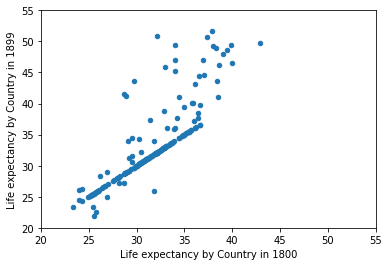

In [14]:
# Import packages
import matplotlib.pyplot as plt

# Create the scatter plot
g1800s.plot(kind='scatter', x='1800', y='1899')

# Specify axis labels
plt.xlabel('Life expectancy by Country in 1800')
plt.ylabel('Life expectancy by Country in 1899')

# Specify axis limits
plt.xlim(20, 55)
plt.ylim(20, 55)

# Display plot
plt.show()

# Note the diagonal line, meaning no change in 99 years. Most likely a data error

In [25]:
def check_null_or_valid(row_data):
    """Function that takes a row of data, drops all missing values,
    and checks if all remaining values are greater than or equal to 0
    """
    no_na = row_data.dropna()
    numeric = pd.to_numeric(no_na)
    ge0 = numeric >= 0
    return ge0

# Check whether the first column is 'Life expectancy'
assert g1800s.columns[0] == 'Life expectancy'

# Check whether the values in the row are valid
assert g1800s.iloc[:, 1:].apply(check_null_or_valid, axis=1).all().all()

# Check that there is only one instance of each country
assert g1800s['Life expectancy'].value_counts()[0] == 1

In [37]:
# Create DF's: g1900 & g2000
g1900s = pd.read_csv('data/g1900.csv')
g2000s = pd.read_csv('data/g2000s.csv')

In [68]:
# Concatenate the DF's row-wise: g1800s, g1900s, & g2000s
gapminder = pd.concat([g1800s, g1900s, g2000s], sort=False) # default for row-wise, and axis=1 for column-wise

print(gapminder.shape)
print(gapminder.head())

(780, 218)
         Life expectancy   1800   1801   1802   1803   1804   1805   1806  \
0               Abkhazia    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
1            Afghanistan  28.21  28.20  28.19  28.18  28.17  28.16  28.15   
2  Akrotiri and Dhekelia    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
3                Albania  35.40  35.40  35.40  35.40  35.40  35.40  35.40   
4                Algeria  28.82  28.82  28.82  28.82  28.82  28.82  28.82   

    1807   1808  ...   2007  2008  2009  2010  2011  2012  2013  2014  2015  \
0    NaN    NaN  ...    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1  28.14  28.13  ...    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2    NaN    NaN  ...    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
3  35.40  35.40  ...    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
4  28.82  28.82  ...    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

   2016  
0   NaN  
1   NaN  
2   NaN  
3   NaN  
4

#### Reshaping data - tidying it

In [69]:
# Melt gapminder: gapminder_melt
gapminder_melt = pd.melt(frame=gapminder, id_vars='Life expectancy')

# Rename the three melted columns to 'country', 'year', 'and 'life_expectancy'
gapminder_melt.columns = ['country', 'year', 'life_expectancy']

#print(gapminder.head())
gapminder_melt.head()

,country,year,life_expectancy
0,Abkhazia,1800,NaN
1,Afghanistan,1800,28.21
2,Akrotiri and Dhekelia,1800,NaN
3,Albania,1800,35.40
4,Algeria,1800,28.82


#### Checking data types

In [70]:
# Import packages
import numpy as np

# Convert the year column to numeric
gapminder_melt.year = pd.to_numeric(gapminder_melt.year)

# Test if country is of type object
assert gapminder_melt.country.dtypes == np.object

# Test if year is of type int64
assert gapminder_melt.year.dtypes == np.int64

# Test if life_expectancy is of type float64
assert gapminder_melt.life_expectancy.dtypes == np.float64

# Since the assert statements didn't throw errors, the columns have the correct data types

In [71]:
# Create the series of countries: countries
countries = gapminder_melt['country']

# Drop all duplicates from countries
countries = countries.drop_duplicates()

# Write the regex: pattern
pattern = '^[A-Za-z\.\s]*$' # Anchor the pattern by putting a '^' in the beginning and a '$' at the end
                            # 'A-Za-z' to match the set of upper and lowercase letters
                            # '\.' to match periods
                            # '\s' to match whitespace between words

# Create the Boolean vector: mask
mask = countries.str.contains(pattern)

# Invert the mask to find values that do not match: mask_inverse
mask_inverse = ~mask

# Subset countries using mask_inverse: invalid_countries
invalid_countries = countries.loc[mask_inverse]

# Print invalid_countries to see if any entries are wrong or need to be fixed 
print(invalid_countries)

49            Congo, Dem. Rep.
50                 Congo, Rep.
53               Cote d'Ivoire
73      Falkland Is (Malvinas)
93               Guinea-Bissau
98            Hong Kong, China
118    United Korea (former)\n
131               Macao, China
132             Macedonia, FYR
145      Micronesia, Fed. Sts.
161            Ngorno-Karabakh
187             St. Barthélemy
193     St.-Pierre-et-Miquelon
225                Timor-Leste
251      Virgin Islands (U.S.)
252       North Yemen (former)
253       South Yemen (former)
258                      Åland
Name: country, dtype: object


#### More cleaning and processing

In [72]:
# Assert that country does not contain any missing values
assert pd.notnull(gapminder_melt.country).all()

# Assert that year does not contain any missing values
assert pd.notnull(gapminder_melt.year).all()

# Print the shape of gapminder_melt
print('Shape before drop: ', gapminder_melt.shape)

# Drop the missing values
gapminder_melt = gapminder_melt.dropna(how='any')

# Print the shape of gapminder_melt
print('Shape after drop: ', gapminder_melt.shape)

Shape before drop:  (169260, 3)
Shape after drop:  (43857, 3)


#### Wrapping up - with visualization and aggregation

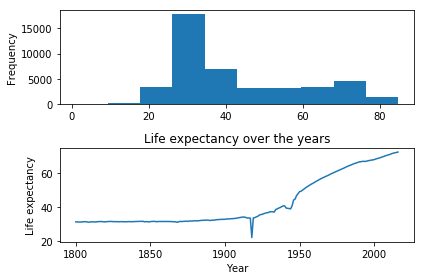

In [78]:
# Add first subplot
plt.subplot(2, 1, 1)

# Create a histogram of life_expectancy
gapminder_melt.life_expectancy.plot(kind='hist')

# Group gapminder_melt: gapminder_agg
gapminder_agg = gapminder_melt.groupby('year')['life_expectancy'].mean()

# Add a second subplot
plt.subplot(2, 1, 2)

# Create a line plot of life expectancy per year
gapminder_agg.plot(kind='line')

# Add title and specify axis labels
plt.title('Life expectancy over the years')
plt.ylabel('Life expectancy')
plt.xlabel('Year')

# Display the plots
plt.tight_layout()
plt.show()

In [82]:
# Print the head of gapminder_agg
gapminder_agg.head()

year
1800    31.486020
1801    31.448905
1802    31.463483
1803    31.377413
1804    31.446318
Name: life_expectancy, dtype: float64

In [83]:

# Print the tail of gapminder_agg
gapminder_agg.tail()

year
2012    71.663077
2013    71.916106
2014    72.088125
2015    72.321010
2016    72.556635
Name: life_expectancy, dtype: float64

In [84]:
# Save both DataFrames to csv files
gapminder_melt.to_csv('data/gapminder_melt_ex.csv')
gapminder_agg.to_csv('data/gapminder_agg_ex.csv')